In [1]:
# 'pandas' is used for importing data in various formats, analyze and visualize data.
# 'numpy' is a multi-dimensional array which stores the values of homogeneous datatypes.np is the alias name.  

%matplotlib inline
import numpy as np
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import tree

In [2]:
#loading data from dataset

df = pd.read_csv('D:\ML_Project_Code_L00157195\dataset.csv')
#To get shape of the dataset 
print(df.shape)
df
# Drop some column which is unwanted and data cleaning 
df.drop(['Hospital_Group', 'Specialty_HIPE', 'Specialty_Name', 'Case_Type', 'Age_Profile', 'Time_Bands','Adult_Child'], axis=1)

(2741, 11)


,Archive_Date,Hospital_HIPE,Hospital_Name,Total
0,31-01-2019,0,Children's Health Ireland,2
1,31-01-2019,102,Naas General Hospital,136
2,31-01-2019,102,Naas General Hospital,96
3,31-01-2019,102,Naas General Hospital,23
4,31-01-2019,102,Naas General Hospital,14
...,...,...,...,...
2736,19-12-2019,918,St. John's Hospital Limerick,157
2737,19-12-2019,918,St. John's Hospital Limerick,59
2738,19-12-2019,918,St. John's Hospital Limerick,53
2739,19-12-2019,918,St. John's Hospital Limerick,26


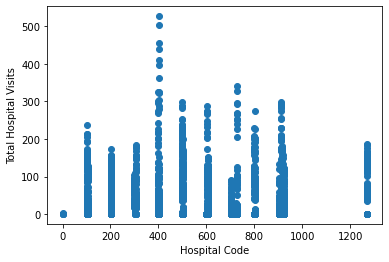

In [3]:
#plot of data which represents the graph of no of patient are visits vs hospital

Act_DT = df['Total']
Tot = df['Hospital_HIPE']
plt.xlabel('Hospital Code')
plt.ylabel('Total Hospital Visits')
plt.scatter(Tot,Act_DT)

In [4]:
# 1. linear regression

In [5]:
# To calculate slope, intercept and SD
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(Tot,Act_DT)


In [6]:
# measure the r-squared error:
r_value ** 2

0.004226354133405992

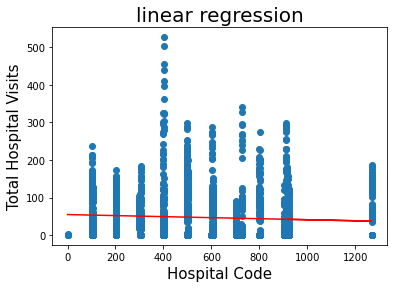

In [7]:
# After training the algorithm execute the below expression to make some predictions
# To predict the value use regression.pedict on the test data.

import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(Tot)
plt.title('linear regression', fontsize = 20)
plt.xlabel('Hospital Code', fontsize = 15)
plt.ylabel('Total Hospital Visits', fontsize = 15)
plt.scatter(Tot,Act_DT)
plt.plot(Tot, fitLine, c='red')
plt.show()

In [8]:
# 2. Polynomial Regression

In [9]:
# Storing values in array to calculate Polynomial Regression

x = np.array(Tot)
y = np.array(Act_DT)
p4 = np.poly1d(np.polyfit(x, y, 9))


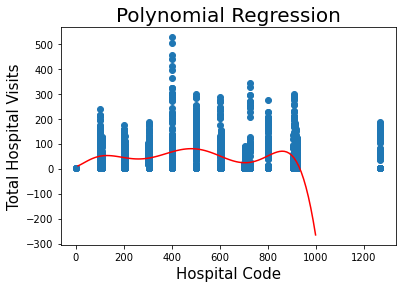

In [10]:
#
import matplotlib.pyplot as plt

xp = np.linspace(9, 1000, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='red')
plt.title('Polynomial Regression', fontsize = 20)
plt.xlabel('Hospital Code', fontsize = 15)
plt.ylabel('Total Hospital Visits', fontsize = 15)
plt.show()

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.06788361731745862


In [12]:
# 3. Support Vector Machines

In [13]:
#import numpy as np
#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid =np.random.uniform(2000.0, 20000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 100.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

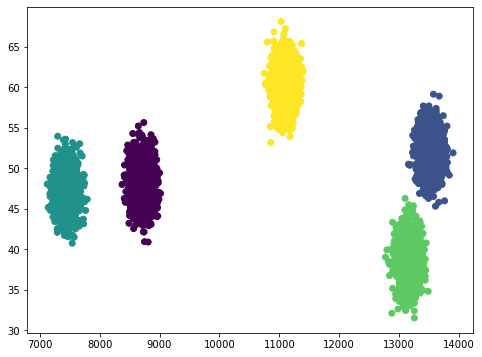

In [14]:
%matplotlib inline
from pylab import *
# Clustere for SVM value calculate 
(X, y) = createClusteredData(10000, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [15]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

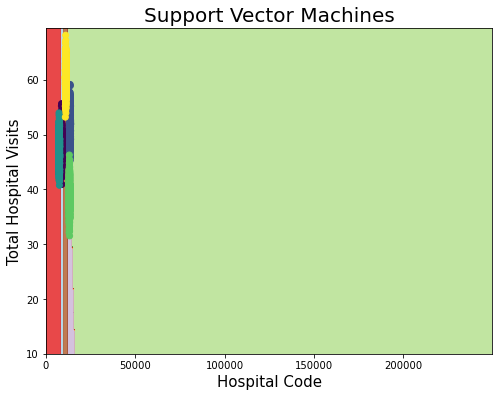

In [16]:
# Ploating points in the final graph

def plotPredictions(clf):
    xx, yy = np.meshgrid(np.arange(0, 250000, 10),
                     np.arange(10, 70, 0.5))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
    plt.title('Support Vector Machines', fontsize = 20)
    plt.xlabel('Hospital Code', fontsize = 15)
    plt.ylabel('Total Hospital Visits', fontsize = 15)
    plt.show()
    
plotPredictions(svc)

In [17]:
# 4. Principal Component Analysis

In [18]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle
# load irish data to get more pridicted value 
iris = load_iris()

numSamples, numFeatures = iris.data.shape
print(numSamples)
print(numFeatures)
print(list(iris.target_names))

150
4
['setosa', 'versicolor', 'virginica']


In [19]:
X = iris.data
pca = PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [20]:
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [21]:
# to get more perfect  value for the PCA plot
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


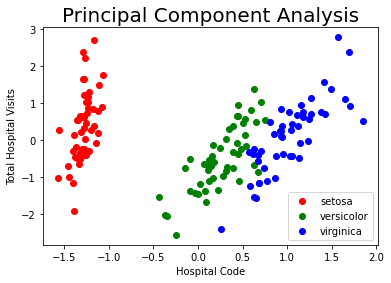

In [22]:
%matplotlib inline
from pylab import *
# Final representation of the PCA algorithm 
colors = cycle('rgb')
target_ids = range(len(iris.target_names))
pl.figure()
for i, c, label in zip(target_ids, colors, iris.target_names):
    pl.scatter(X_pca[iris.target == i, 0], X_pca[iris.target == i, 1],
        c=c, label=label)
    plt.title('Principal Component Analysis', fontsize = 20)
    plt.xlabel('Hospital Code', fontsize = 10)
    plt.ylabel('Total Hospital Visits', fontsize = 10)
pl.legend()
pl.show()
    